In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
df_colesterol = pd.read_csv('./datasets/dataset_colesterol.csv')

In [136]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [137]:
df_colesterol.drop(columns=['Id'], inplace=True)
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Grupo Sanguíneo     996 non-null    object 
 1   Fumante             997 non-null    object 
 2   Nível de Atividade  996 non-null    object 
 3   Idade               997 non-null    float64
 4   Peso                997 non-null    float64
 5   Altura              997 non-null    float64
 6   Colesterol          1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [138]:
df_colesterol.columns = [
    'grupo_sanguineo',
    'fumante',
    'nivel_atividade',
    'idade',
    'peso',
    'altura',
    'colesterol'
]
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grupo_sanguineo  996 non-null    object 
 1   fumante          997 non-null    object 
 2   nivel_atividade  996 non-null    object 
 3   idade            997 non-null    float64
 4   peso             997 non-null    float64
 5   altura           997 non-null    float64
 6   colesterol       1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [139]:
df_eda = df_colesterol.copy()
df_bucketing = df_colesterol.copy()

## EDA

In [140]:
df_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade,idade,peso,altura,colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [141]:
df_eda.grupo_sanguineo.unique()

array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [142]:
df_eda.fumante.unique()

array(['Sim', 'Não', nan], dtype=object)

In [143]:
df_eda.nivel_atividade.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [144]:
df_eda.isna().sum()

grupo_sanguineo    4
fumante            3
nivel_atividade    4
idade              3
peso               3
altura             3
colesterol         0
dtype: int64

In [145]:
# Medidas estatísticas do DF
df_eda.describe()

,idade,peso,altura,colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [146]:
# Coletar medidas das variáveis categóricas
moda_grupo_sanguineo = df_eda.grupo_sanguineo.mode()
moda_nivel_atividade = df_eda.nivel_atividade.mode()
moda_fumante = df_eda.fumante.mode()


In [147]:
# Coletar medidas das variáveis númericas
mediana_idade = df_eda.idade.median()
mediana_peso = df_eda.peso.median()
mediana_altura = df_eda.altura.median()


In [148]:
# Inputar valores ausentes
df_eda.fillna(value={'grupo_sanguineo' : moda_grupo_sanguineo[0], 
                            'nivel_atividade' : moda_nivel_atividade[0],
                            'fumante' : moda_fumante[0],
                            'idade' : mediana_idade,
                            'peso' : mediana_peso,
                            'altura' : mediana_altura}, inplace=True)
df_eda.isna().sum()

grupo_sanguineo    0
fumante            0
nivel_atividade    0
idade              0
peso               0
altura             0
colesterol         0
dtype: int64

In [149]:
# Converter idade e altura para inteiro
df_eda.idade = df_eda.idade.astype(int)
df_eda.altura = df_eda.altura.astype(int)
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grupo_sanguineo  1000 non-null   object 
 1   fumante          1000 non-null   object 
 2   nivel_atividade  1000 non-null   object 
 3   idade            1000 non-null   int64  
 4   peso             1000 non-null   float64
 5   altura           1000 non-null   int64  
 6   colesterol       1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [150]:
df_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade,idade,peso,altura,colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: ylabel='idade'>

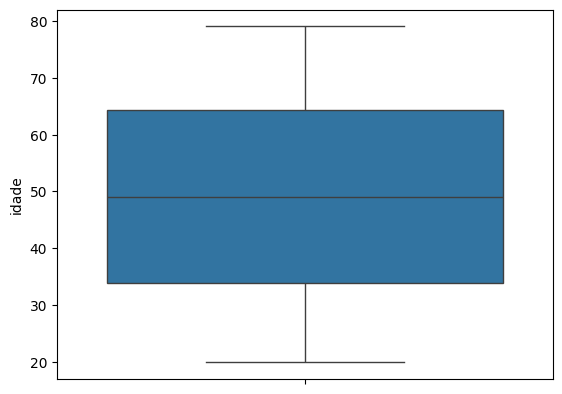

In [151]:
# Detectar outliers
sns.boxplot(data=df_eda, y='idade')

<Axes: ylabel='peso'>

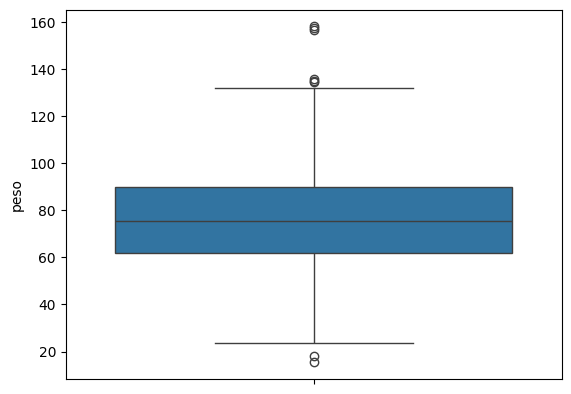

In [152]:
sns.boxplot(data=df_eda, y='peso')

In [153]:
# Filtrar o público a ser removido
df_eda[df_eda['peso'] < 40].peso.count()

np.int64(37)

In [154]:
# Remover público do DF
df_eda.drop(df_eda[df_eda['peso'] < 40].peso.index, inplace=True)
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grupo_sanguineo  963 non-null    object 
 1   fumante          963 non-null    object 
 2   nivel_atividade  963 non-null    object 
 3   idade            963 non-null    int64  
 4   peso             963 non-null    float64
 5   altura           963 non-null    int64  
 6   colesterol       963 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 60.2+ KB


<Axes: xlabel='grupo_sanguineo', ylabel='colesterol'>

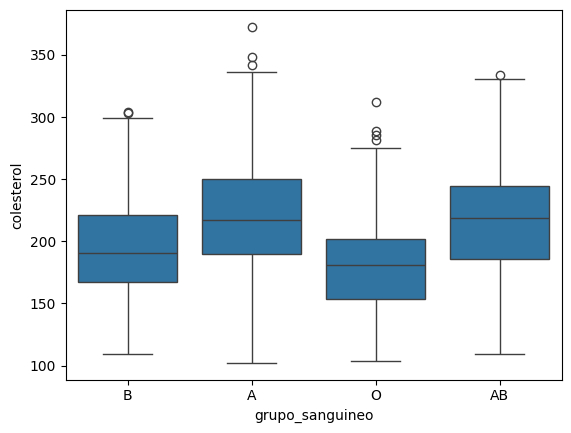

In [155]:
# Cruzamento de Variáveis Categoricas com Nível de Colesterol
sns.boxplot(data=df_eda, x='grupo_sanguineo', y='colesterol')

<Axes: xlabel='fumante', ylabel='colesterol'>

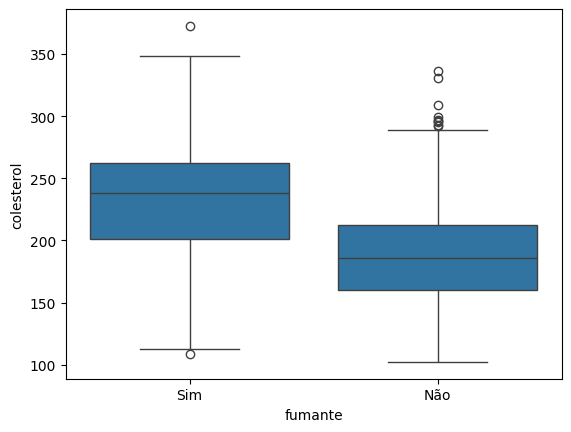

In [156]:
# Cruzamento de Variáveis Categoricas com Nível de Colesterol
sns.boxplot(data=df_eda, x='fumante', y='colesterol')

<Axes: xlabel='nivel_atividade', ylabel='colesterol'>

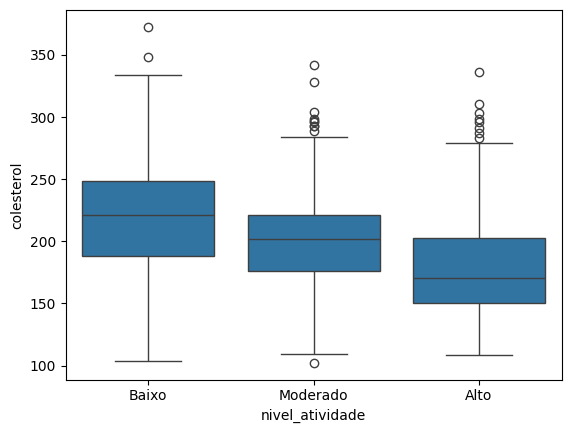

In [157]:
# Cruzamento de Variáveis Categoricas com Nível de Colesterol
sns.boxplot(data=df_eda, x='nivel_atividade', y='colesterol')

<Axes: xlabel='idade', ylabel='colesterol'>

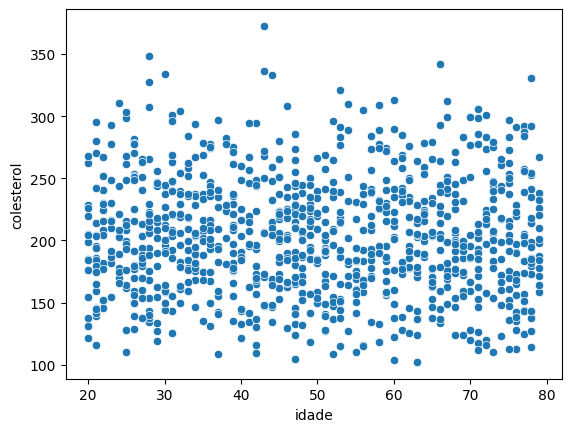

In [158]:
# Cruzamento de variáveis numéricas com nível colesterol
sns.scatterplot(data=df_eda, x='idade', y='colesterol')

<Axes: xlabel='peso', ylabel='colesterol'>

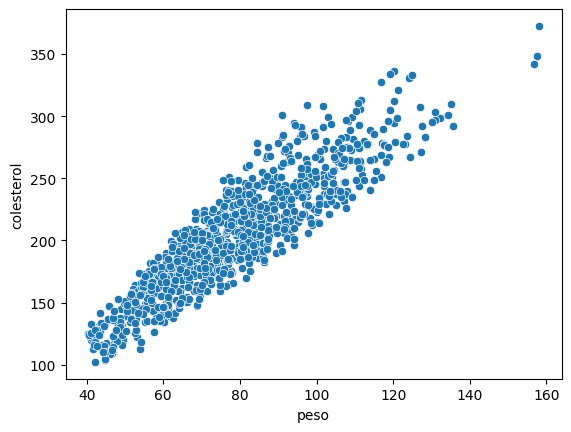

In [159]:
# Cruzamento de variáveis numéricas com nível colesterol
sns.scatterplot(data=df_eda, x='peso', y='colesterol')

<Axes: xlabel='altura', ylabel='colesterol'>

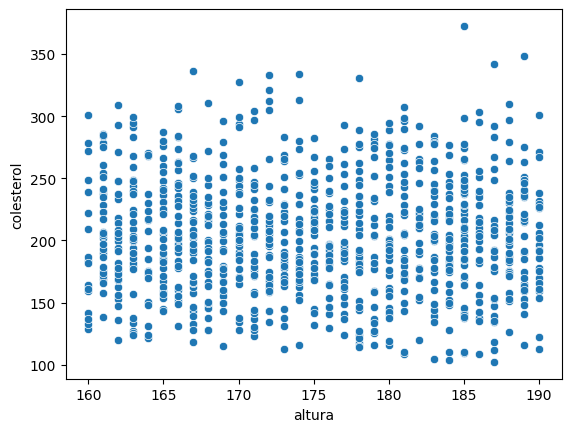

In [160]:
# Cruzamento de variáveis numéricas com nível colesterol
sns.scatterplot(data=df_eda, x='altura', y='colesterol')

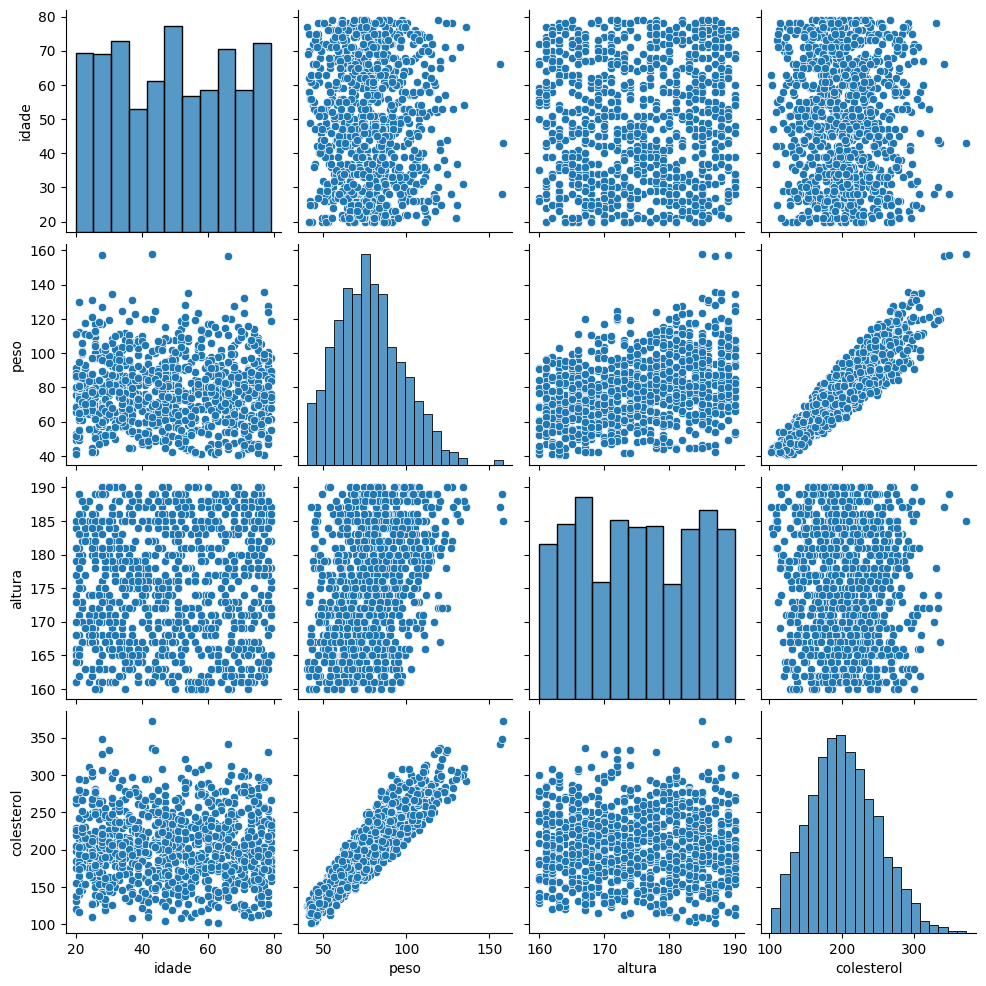

In [161]:
sns.pairplot(df_eda)

In [162]:
# Converter variáveis categoricas nominais em numericas, usando One-Hot Enconding do Pandas
df_eda = pd.get_dummies(df_eda, columns = ['grupo_sanguineo', 'fumante'], dtype='int64')
df_eda.head(10)

,nivel_atividade,idade,peso,altura,colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0
5,Baixo,68,66.8,170,185.31,0,0,1,0,1,0
6,Baixo,60,117.3,181,289.33,1,0,0,0,0,1
7,Moderado,35,86.9,174,216.48,0,0,0,1,0,1
8,Baixo,62,81.3,166,235.30,0,0,0,1,1,0
10,Baixo,57,123.6,183,283.87,1,0,0,0,0,1


In [163]:
# Converter variavel categorica ordinal em numerica, usando factorize do Pandas
df_eda['nivel_atividade'] = pd.factorize(df_eda.nivel_atividade)[0]+1
df_eda.head(10)

,nivel_atividade,idade,peso,altura,colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,1,33,85.1,186,199.63,0,0,1,0,0,1
1,2,68,105.0,184,236.98,1,0,0,0,1,0
2,3,25,64.8,180,161.79,0,0,0,1,1,0
3,3,43,120.2,167,336.24,1,0,0,0,1,0
4,1,79,88.5,175,226.23,0,1,0,0,1,0
5,1,68,66.8,170,185.31,0,0,1,0,1,0
6,1,60,117.3,181,289.33,1,0,0,0,0,1
7,2,35,86.9,174,216.48,0,0,0,1,0,1
8,1,62,81.3,166,235.30,0,0,0,1,1,0
10,1,57,123.6,183,283.87,1,0,0,0,0,1


<Axes: >

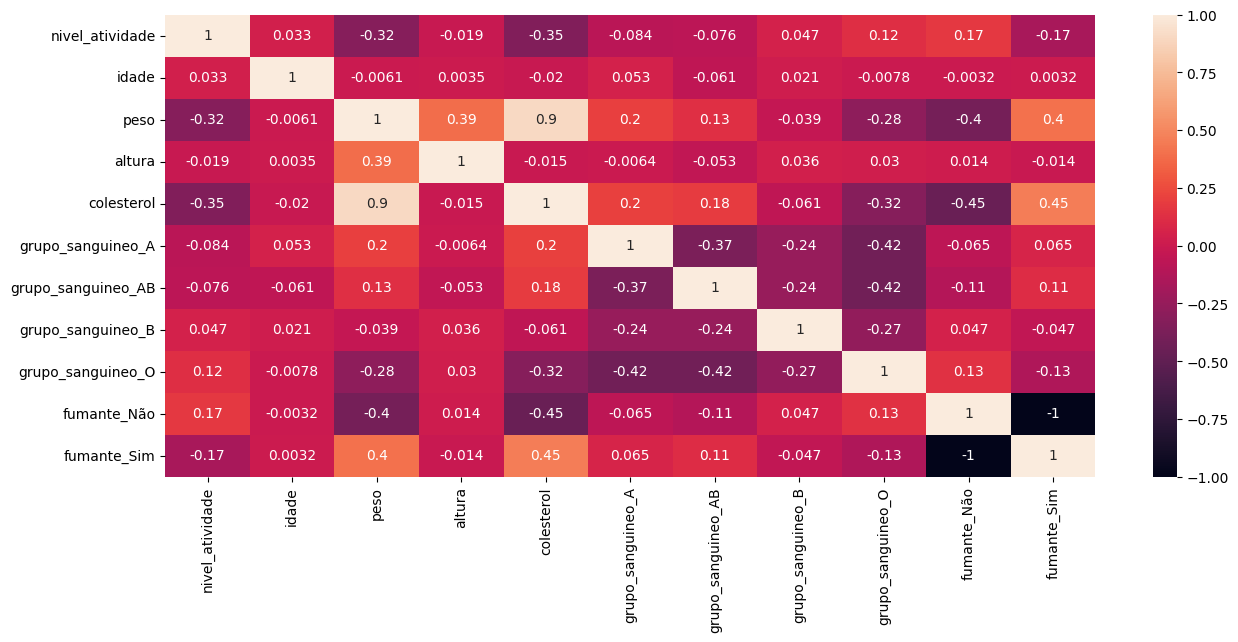

In [164]:
# Mapa de calor com correlação
plt.figure(figsize=(15, 6))
sns.heatmap(df_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

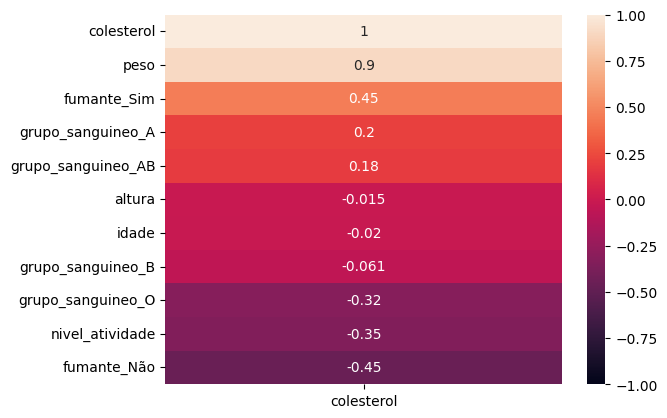

In [165]:
# Formato de ranking, correlação com a variavel target(colesterol)
sns.heatmap(df_eda.corr()[['colesterol']].sort_values(by='colesterol', ascending=False), vmin=-1, vmax=1, annot=True)

In [166]:
# Buckeing Idade
bins_idade = [20, 30, 40, 50, 60, 70, 80]
labels_idade = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_bucketing['escala_idade'] = pd.cut(x = df_bucketing['idade'], bins = bins_idade, labels = labels_idade, include_lowest=True)



In [167]:
df_bucketing.head(10)

,grupo_sanguineo,fumante,nivel_atividade,idade,peso,altura,colesterol,escala_idade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


<Axes: xlabel='escala_idade', ylabel='colesterol'>

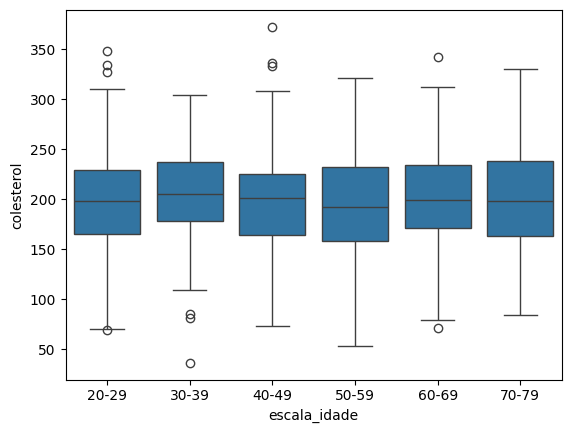

In [168]:
sns.boxplot(df_bucketing, x='escala_idade', y='colesterol')

In [169]:
# Buckeing Peso
bins_peso = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
labels_peso = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149', '150-159']
df_bucketing['escala_peso'] = pd.cut(x = df_bucketing['peso'], bins = bins_peso, labels = labels_peso, include_lowest=True)
df_bucketing.head(10)


,grupo_sanguineo,fumante,nivel_atividade,idade,peso,altura,colesterol,escala_idade,escala_peso
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39,80-89
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69,100-109
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29,60-69
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49,120-129
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79,80-89
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59,110-119
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39,80-89
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69,80-89
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49,NaN


<Axes: xlabel='escala_peso', ylabel='colesterol'>

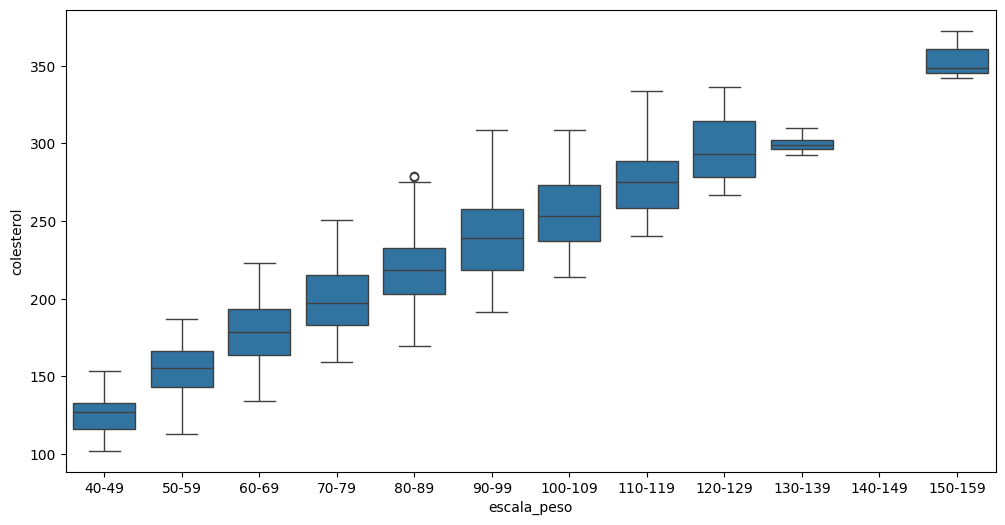

In [170]:
plt.figure(figsize=(12,6))
sns.boxplot(df_bucketing, x='escala_peso', y='colesterol')

### Treinar modelo

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

In [172]:
# Criar Dataset de Treino e Teste
df_colesterol.drop(df_colesterol[df_colesterol['peso'] < 40].peso.index, inplace=True)
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grupo_sanguineo  960 non-null    object 
 1   fumante          960 non-null    object 
 2   nivel_atividade  959 non-null    object 
 3   idade            960 non-null    float64
 4   peso             960 non-null    float64
 5   altura           960 non-null    float64
 6   colesterol       963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [173]:
x = df_colesterol.drop(columns='colesterol', axis=1)
y = df_colesterol['colesterol']

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=51)

In [175]:
# Pipeline
# Imputar moda nas variáveis categoricas - grupo_sanguineo, fumante, nivel_atividade
# Padronizar variáveis numericas - idade, altura, peso
# OneHotEncode nas variáveis categoricas nominais - grupo_sanguineo, fumante
# OrdinalEncoder nas variáveis categóricas ordinais - nivel_atividade
# Imputar mediana nas variáveis numericas - idade, altura, peso

# Nome das colunas
colunas_categoricas = ['grupo_sanguineo', 'fumante']
colunas_numericas = ['idade', 'altura', 'peso']
colunas_ordinais = ['nivel_atividade']

In [176]:
# Transformer Categoricas
transformer_categorias = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [177]:
# Transformer Ordinais
transformer_ordinais = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']],handle_unknown='error'))
])

In [178]:
# Transformer Numericas
transformer_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [179]:
# Criar um ColumnTransformer que encapsula todas as transformações

preprocessor = ColumnTransformer(
    transformers = [
        ('num', transformer_numericas, colunas_numericas),
        ('cat', transformer_categorias, colunas_categoricas),
        ('ord', transformer_ordinais, colunas_ordinais),
    ]
)

In [180]:
# Criando o Pipeline principal = Pre processamento + treinamento
model_reg = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regression', LinearRegression())])

In [181]:
# Treinar Modelo

model_reg.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'altura', 'peso']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grupo_sanguineo',
                                                   'fumante']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['nivel_atividade'])])),
                ('regression', LinearRegression())])

### Analise de métricas

In [182]:
# Calcular predição
y_pred = model_reg.predict(x_test)

In [183]:
# Calcular R2 Score
r2_score(y_test, y_pred)

0.9594250724093464

In [184]:
# Calcular MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

np.float64(7.313838031022505)

In [185]:
# Calcular RMSE (Root Mean Absoluet Error)
root_mean_squared_error(y_test, y_pred)

np.float64(9.097649246487034)

### Analise de Residuos

In [186]:
# Calcular residuos
residuos = y_test - y_pred

In [187]:
# Tranformar residuos na escala padrão
# (x - media)/desvio_padrão
from scipy.stats import zscore
residuos_std = zscore(residuos)

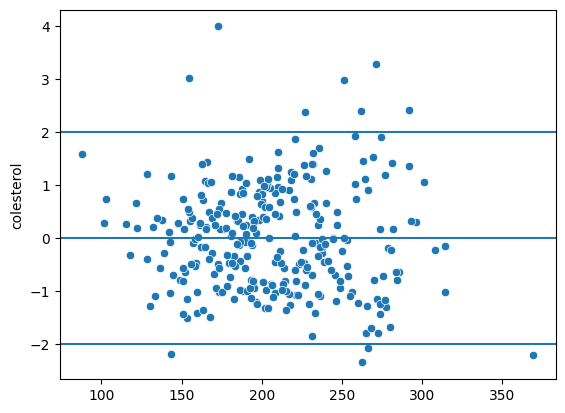

In [188]:
# Verificar linearidade dos residuos: Valores entre -2 e 2
# Verificar homocedasticidade: Valores em torno da reta
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

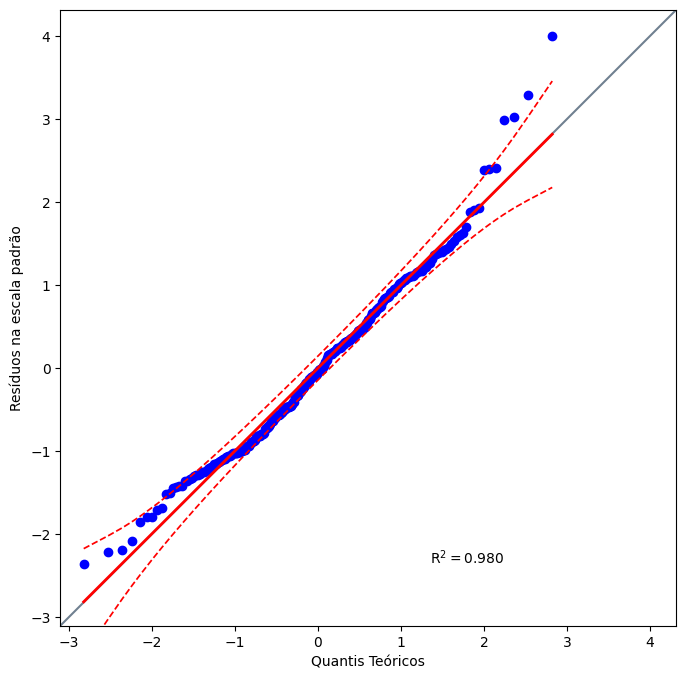

In [189]:
# Checar se residuos seguem uma distribuição normal
# QQ plot 
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [190]:
# Teste de normalidade Shapiro-Wilk
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt
stat_shapiro, p_value_shapiro = shapiro(residuos)
print("Estatistica do teste: {} e P_Value: {}".format(stat_shapiro, p_value_shapiro))

Estatistica do teste: 0.9807737729720742 e P_Value: 0.0006268860444493341


In [191]:
# Teste de kolmogorov-smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print("Estatistica do teste: {} e P_Value: {}".format(stat_ks, p_value_ks))

Estatistica do teste: 0.42455920998485785 e P_Value: 8.925833190901912e-48


In [192]:
# Teste de Lilliefors
stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print("Estatistica do teste: {} e P_Value: {}".format(stat_ll, p_value_ll))

Estatistica do teste: 0.049553710301929565 e P_Value: 0.1253332372073488


In [193]:
# Teste de Anderson-Darling
stat_and, critical_and, significance_ = anderson(residuos, dist='norm')

In [194]:
critical_and

array([0.568, 0.647, 0.776, 0.906, 1.077])

In [195]:
significance_

array([15. , 10. ,  5. ,  2.5,  1. ])

In [196]:
print("Estatistica do teste: {} e Valor Crítico: {}".format(stat_and, critical_and[2]))

Estatistica do teste: 0.9169275158490109 e Valor Crítico: 0.776


In [197]:
# Teste de Homocedasticidade de goldfeld-quandt
pipe = Pipeline(steps=[('preprocessor', preprocessor)])
x_test_transformed = pipe.fit_transform(x_test)
x_test_transformed

array([[-1.44340738, -0.58669129,  0.22608781, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28157488, -1.05685776, -1.20886474, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10973608, -0.35160806, -0.84754575, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.00250157, -1.52702423, -1.09014564, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.28056099, -0.35160806,  0.17447081, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.72545605, -1.17439938, -1.65277092, ...,  0.        ,
         1.        ,  0.        ]])

In [198]:
test_goldfeld = het_goldfeldquandt(residuos, x_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]
print("Estatistica do teste: {} e P_Value: {}".format(stat_goldfeld, p_value_goldfeld))

Estatistica do teste: 0.6716135765253543 e P_Value: 0.9893959472385482


### Realizar predições individuais

In [215]:
predicao_individual = {
    'grupo_sanguineo' : 'O',
    'fumante' : 'Não',
    'nivel_atividade' : 'Alto',
    'idade' : 21,
    'peso' : 76.3,
    'altura' : 173
}
sample_df = pd.DataFrame(predicao_individual, index=[1])

In [216]:
sample_df

,grupo_sanguineo,fumante,nivel_atividade,idade,peso,altura
1,O,Não,Alto,21,76.3,173


In [217]:
model_reg.predict(sample_df)

array([197.63157516])

In [202]:
import joblib
joblib.dump(model_reg, './modelo_colesterol.pkl')

['./modelo_colesterol.pkl']